In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kausthubkannan/5-flower-types-classification-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the '5-flower-types-classification-dataset' dataset.
Path to dataset files: /kaggle/input/5-flower-types-classification-dataset


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset & DataLoader
data_dir = "/root/.cache/kagglehub/datasets/kausthubkannan/5-flower-types-classification-dataset/versions/1/flower_images"
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

class_names = dataset.classes
print("Classes:", class_names)

Classes: ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
class CNN_(nn.Module):
    def __init__(self, input_channels=3, num_classes=5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(input_channels, 32, 3, padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,3,padding="same"),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*28*28, 512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,num_classes)
        )

    def forward(self,x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
num_classes = len(class_names)
model = CNN_(num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs = 20
losses = []
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch_features, batch_labels in dataloader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        optimizer.zero_grad()
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/20], Loss: 1.1750
Epoch [2/20], Loss: 0.8857
Epoch [3/20], Loss: 0.6768
Epoch [4/20], Loss: 0.4793
Epoch [5/20], Loss: 0.3043
Epoch [6/20], Loss: 0.1912
Epoch [7/20], Loss: 0.1100
Epoch [8/20], Loss: 0.0547
Epoch [9/20], Loss: 0.0347
Epoch [10/20], Loss: 0.0501
Epoch [11/20], Loss: 0.0272
Epoch [12/20], Loss: 0.0208
Epoch [13/20], Loss: 0.0155
Epoch [14/20], Loss: 0.0131
Epoch [15/20], Loss: 0.0189
Epoch [16/20], Loss: 0.0154
Epoch [17/20], Loss: 0.0119
Epoch [18/20], Loss: 0.0097
Epoch [19/20], Loss: 0.0118
Epoch [20/20], Loss: 0.0104


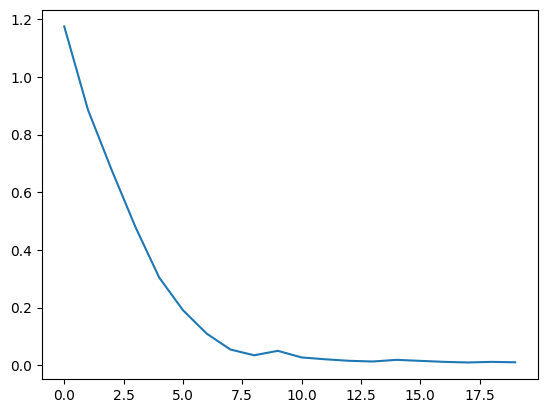

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [ ]:
from PIL import Image
import torch
model = CNN_(num_classes=5)
torch.save(model.state_dict(), "/content/model.pth")
model.load_state_dict(torch.load("/content/model.pth", map_location=device))
model.to(device)
model.eval()
img_path = '/content/tulip.jpeg'
image = Image.open(img_path).convert('RGB')
image = transform(image).unsqueeze(0)
image = image.to(device)
with torch.no_grad():
    outputs = model(image)
    _, predicted = torch.max(outputs, 1)
class_names = ['Lilly', 'Lotus', 'Orchid', 'Sunflower', 'Tulip']
print("Predicted class:", class_names[predicted.item()])


Predicted class: Tulip
